# Package dan Data yang Digunakan

**Membaca dataset**

In [1]:
library(dplyr)
#Membaca dataset dengan format csv disimpan pada variabel df_event
df_event <- read.csv('../input/event.csv', stringsAsFactors = F)
#Menampilkan rangkuman data dengan fungsi glimpse pada package dplyr
glimpse(df_event)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Rows: 33,571
Columns: 4
$ loan_id     <int> 2, 2, 2, 133, 133, 133, 2693, 2693, 2693, 6, 6, 6, 2769, …
$ investor_id <int> 114, 114, 114, 114, 114, 114, 8159, 8159, 8159, 163, 163,…
$ nama_event  <chr> "investor_view_loan", "investor_order_loan", "investor_pa…
$ created_at  <chr> "2019-07-07 11:47:58", "2019-07-07 11:48:16", "2019-07-07…


**Mengubah kolom created_at menjadi tipe Timestamp**

In [2]:
#Load package lubridate untuk mengolah tipe data Date maupun Timestamp
library(lubridate)
#Mengubah character berformat Year-Month-Date Hour-Minute-Second menjadi tipe timestamp pada kolom created_at dengan fungsi ymd_hms
df_event$created_at <- ymd_hms(df_event$created_at)
#Menampilkan rangkuman data
glimpse(df_event)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




Rows: 33,571
Columns: 4
$ loan_id     <int> 2, 2, 2, 133, 133, 133, 2693, 2693, 2693, 6, 6, 6, 2769, …
$ investor_id <int> 114, 114, 114, 114, 114, 114, 8159, 8159, 8159, 163, 163,…
$ nama_event  <chr> "investor_view_loan", "investor_order_loan", "investor_pa…
$ created_at  <dttm> 2019-07-07 11:47:58, 2019-07-07 11:48:16, 2019-07-07 13:…


# Summary Event

In [3]:
#Dari data.frame df_event dikelompokkan dengan group by berdasarkan nama_event
df_event %>% group_by(nama_event) %>% 
    #untuk  mengetahui jumlah terjadinya event, atau ada berapa baris
    summarise(jumlah_event = n(), 
              #untuk mengetahui jumlah unik loan_id menggunakan fungsi n_distinct()
              loan = n_distinct(loan_id), 
              #untuk mengetahui jumlah unik investor_id
              investor = n_distinct(investor_id))

`summarise()` ungrouping output (override with `.groups` argument)



nama_event,jumlah_event,loan,investor
<chr>,<int>,<int>,<int>
investor_order_loan,3714,3641,804
investor_pay_loan,3632,3632,771
investor_register,17931,1,17931
investor_view_loan,4616,3678,1095
loan_to_marketplace,3678,3678,1


Berdasarkan hasil tersebut, ternyata ada 5 event. Dengan penjelasan sebagai berikut :

1. investor_register : Event saat Investor register.
Jumlah event sama dengan unik investor, artinya setiap investor melakukan event ini hanya 1 kali. Jumlah loan hanya 1, ini isinya NA, karena register ini tidak memerlukan loan.
2. loan_to_marketplace : Event saat loan diupload ke marketplace,
Jumlah event sama dengan jumlah loan, artinya setiap loan diupload hanya 1 kali. Jumlah investor hanya 1, ini isi NA, karena saat upload ke marketplace tidak berhubungan dengan investor

3. investor_view_loan : Event saat investor melihat detail loan di marketplace.
Jumlah event nya tidak sama dengan unik loan maupun unik investor, artinya 1 investor dapat melihat loan yang sama beebrapa kali, dan 1 loan bisa dilihat oleh beberapa investor berbeda

4. investor_order_loan : Event saat investor memesan loan, menunggu pembayaran.
Jumlah event nya tidak sama dengan unik loan maupun unik investor, artinya 1 loan bisa dipesan oleh beberapa investor berbeda (jika pemesanan sebelumnya tidak dibayar)

5. investor_pay_loan : Event saat investor membayar loan dari pesanan sebelumnya.
Jumlah Event nya sama dengan unik loan, artinya 1 loan ini hanya bisa dibayar oleh 1 investor. Jumlah investor lebih sedikit daripada jumlah loan artinya 1 investor bisa membeli banyak loan

# Mengubah format data proses investasi loan agar nama event menjadi nama kolom

**Event loan di-upload ke marketplace**

In [4]:
#Membuat data.frame baru
df_marketplace <-df_event %>% 
    #Memfilter kolom nama_event 'loan_to_marketplace'
    filter(nama_event == 'loan_to_marketplace') %>% 
    #Memilih kolom apa saja yang mau diambil dengan select, yakni loan_id dan marketplace(ubah nama dari created_at)
    select(loan_id, marketplace = created_at) 
#Menampilkan data pada data.frame df_marketplace
df_marketplace

loan_id,marketplace
<int>,<dttm>
1,2019-07-06 09:03:04
2,2019-07-06 09:00:00
3,2019-07-06 09:03:04
4,2019-07-06 09:03:04
5,2019-07-05 11:45:07
6,2019-07-08 16:35:28
7,2019-07-14 10:16:27
8,2019-07-05 11:45:07
9,2019-07-05 11:45:07


**Event investor melihat detail loan**

In [5]:
#Membuat data.frame baru
df_view_loan <- df_event %>% 
    #Memfilter kolom nama_event 'investor_view_loan'
    filter(nama_event == 'investor_view_loan') %>% 
    #Mengelompokkan per loan_id dan investor_id
    group_by(loan_id, investor_id) %>% 
    #Summarise untuk tahu 1 investor view berapa kali loan tersebut dengan fungsi n()
    summarise(jumlah_view = n(), 
              #Untuk tahu kapan investor pertama kali melihat detail dari loan tersebut menggunakan fungsi min()
              pertama_view = min(created_at), 
              #untuk tahu kapan investor terahir kali melihat detail dari loan tersebutmenggunakan fungsi max()
              terakhir_view = max(created_at))

df_view_loan

`summarise()` regrouping output by 'loan_id' (override with `.groups` argument)



loan_id,investor_id,jumlah_view,pertama_view,terakhir_view
<int>,<int>,<int>,<dttm>,<dttm>
1,107,1,2019-07-07 11:48:11,2019-07-07 11:48:11
2,114,1,2019-07-07 11:47:58,2019-07-07 11:47:58
3,97,1,2019-07-06 09:50:00,2019-07-06 09:50:00
4,97,1,2019-07-06 09:49:20,2019-07-06 09:49:20
5,107,1,2019-07-05 12:54:25,2019-07-05 12:54:25
6,163,1,2019-07-08 16:40:31,2019-07-08 16:40:31
7,133,2,2019-07-14 11:04:46,2019-07-14 11:16:18
8,71,1,2019-07-05 11:47:10,2019-07-05 11:47:10
8,79,1,2019-07-05 12:05:14,2019-07-05 12:05:14


**Event investor pesan dan bayar loan**

In [6]:
#Load packages tidyr, digunakan untuk memformat bentuk data
library(tidyr)

#Membuat data.frame baru
df_order_pay <- df_event %>%
    #Memfilter kolom nama_event 'investor_order_loan' dan 'investor_pay_loan'
    filter(nama_event %in% c('investor_order_loan', 'investor_pay_loan')) %>%
    #Menggunakan fungsi spread pada kolom nama_event dan created_at agar nama_event menjadi nama kolom
    spread(nama_event, created_at) %>%
    #Select pada kolom investor_id, loan_id dan nama_event yang telah di spread 
    select(loan_id, investor_id, order = investor_order_loan, 
           pay = investor_pay_loan)

df_order_pay

loan_id,investor_id,order,pay
<int>,<int>,<dttm>,<dttm>
1,107,2019-07-07 11:48:57,2019-07-07 12:02:18
2,114,2019-07-07 11:48:16,2019-07-07 13:14:39
3,97,2019-07-06 09:50:02,2019-07-06 10:14:44
4,97,2019-07-06 09:49:23,2019-07-06 09:59:51
5,107,2019-07-05 12:55:15,2019-07-05 13:55:54
6,163,2019-07-08 16:42:03,2019-07-08 16:45:56
7,133,2019-07-14 11:16:54,2019-07-14 11:22:00
8,79,2019-07-05 12:06:21,2019-07-05 17:04:56
9,79,2019-07-05 12:11:43,2019-07-05 17:04:52


**Gabungan Data Loan Investasi**

In [7]:
#Membuat data.frame baru
df_loan_invest <- df_marketplace %>% 
    #Melakukan left join df_marketplace dengan df_view_loan berdasarkan loan_id
    left_join(df_view_loan, by = 'loan_id') %>% 
    #Melakukan left join dengan df_order_pay berdasarkan loan_id dan investor_id
    left_join(df_order_pay, by = c('loan_id','investor_id'))

df_loan_invest

loan_id,marketplace,investor_id,jumlah_view,pertama_view,terakhir_view,order,pay
<int>,<dttm>,<int>,<int>,<dttm>,<dttm>,<dttm>,<dttm>
1,2019-07-06 09:03:04,107,1,2019-07-07 11:48:11,2019-07-07 11:48:11,2019-07-07 11:48:57,2019-07-07 12:02:18
2,2019-07-06 09:00:00,114,1,2019-07-07 11:47:58,2019-07-07 11:47:58,2019-07-07 11:48:16,2019-07-07 13:14:39
3,2019-07-06 09:03:04,97,1,2019-07-06 09:50:00,2019-07-06 09:50:00,2019-07-06 09:50:02,2019-07-06 10:14:44
4,2019-07-06 09:03:04,97,1,2019-07-06 09:49:20,2019-07-06 09:49:20,2019-07-06 09:49:23,2019-07-06 09:59:51
5,2019-07-05 11:45:07,107,1,2019-07-05 12:54:25,2019-07-05 12:54:25,2019-07-05 12:55:15,2019-07-05 13:55:54
6,2019-07-08 16:35:28,163,1,2019-07-08 16:40:31,2019-07-08 16:40:31,2019-07-08 16:42:03,2019-07-08 16:45:56
7,2019-07-14 10:16:27,133,2,2019-07-14 11:04:46,2019-07-14 11:16:18,2019-07-14 11:16:54,2019-07-14 11:22:00
8,2019-07-05 11:45:07,71,1,2019-07-05 11:47:10,2019-07-05 11:47:10,NA,NA
8,2019-07-05 11:45:07,79,1,2019-07-05 12:05:14,2019-07-05 12:05:14,2019-07-05 12:06:21,2019-07-05 17:04:56


# Analisis Proses Investasi

**Melihat hubungan jumlah view dengan order**

In [8]:
#Akan melihat apakah ada hubungan antara berapa kali investor melihat loan dengan keputusan order atau tidak
#Menggunakan data.frame df_loan_invest
df_loan_invest %>%
    #Membuat status_order dengan isi ‘not_order’ jika tidak order (kolom order kosong) dan ‘order’ untuk lainnya
    mutate(status_order = ifelse( is.na(order), 'not_order','order')) %>% 
    #Hitung kombinasi jumlah_view dan status_order yang baru dibuat dengan fungsi count
    count(jumlah_view, status_order) %>% 
    #spread status_order sebagai key dengan value n yang merupakan hasil dari count, set fill = 0 agar ketika ada yang kosong diganti dengan 0
    spread(status_order, n, fill = 0) %>%  
    #Hitung persen_order yang merupakan nilai order dibagi total dari order dan not_order, format dengan percent
    mutate(persen_order = scales::percent(order/(order + not_order)))

jumlah_view,not_order,order,persen_order
<int>,<dbl>,<dbl>,<chr>
1,570,3513,86.0%
2,20,173,89.6%
3,3,23,88.5%
4,0,3,100.0%
5,1,1,50.0%
7,0,1,100.0%
40,1,0,0.0%


**Berapa lama waktu yang dibutuhkan investor untuk pesan sejak pertama melihat detail loan**

In [9]:
#Menggunakan data.frame df_loan_invest
df_loan_invest %>%
    #Filter hanya yang order (kolom tidak kosong)
    filter(!is.na(order)) %>% 
    #Hitung lama_order_view, difftime digunakan untuk menghitung selisih antara 2 waktu (Kolom order dengan pertama_view)
    #Digunakan units “mins” yang berarti output ditampilkan dalam satuan menit
    mutate(lama_order_view = as.numeric(difftime(order, pertama_view, units = "mins"))) %>% 
    #Dikelompokkan berdasarkan jumlah_view
    group_by(jumlah_view) %>% 
    #menghitung summary (jumlah transaksi, min, median, mean dan max) dari kolom lama_order_view
    summarise_at(vars(lama_order_view), funs(total = n(), min, median, mean, max)) %>% 
    #Format hasilnya dengan pembulatan 2 digit dibelakang koma agar angkanya seragam
    mutate_if(is.numeric, funs(round(.,2)))

Warning message:
“`funs()` is deprecated as of dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


jumlah_view,total,min,median,mean,max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3513,0.03,1.35,2.97,79.65
2,173,0.43,22.07,61.10,2446.02
3,23,7.25,32.05,66.40,494.52
4,3,17.07,33.87,34.06,51.25
5,1,1113.35,1113.35,1113.35,1113.35
7,1,549.27,549.27,549.27,549.27


**Rata- rata waktu pemesanan sejak loan di-upload setiap minggu nya**

`summarise()` ungrouping output (override with `.groups` argument)



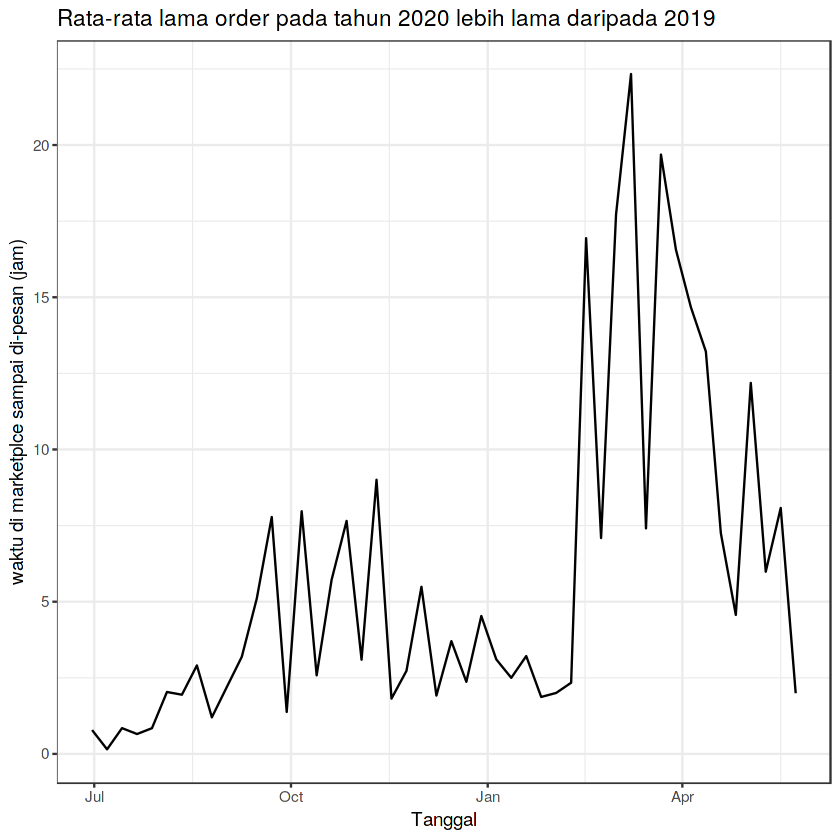

In [10]:
library(ggplot2)
#Membuat data.frame baru dengan menggunakan data.frame df_loan_invest
df_lama_order_per_minggu <- df_loan_invest %>%
    #Filter hanya yang order (kolom tidak kosong)
    filter(!is.na(order)) %>%
    #Buat kolom tanggal yang merupakan pembualatan dalam satuan minggu, dengan menggunakan fungsi floor_date terhadap kolom marketplace
    mutate(tanggal = floor_date(marketplace, 'week'),
           #Hitung lama_order sejak di-upload ke marketplace (dalam jam)
           lama_order = as.numeric(difftime(order, marketplace, units = "hour"))) %>%
    #Dikelompokkan berdasarkan kolom tanggal
    group_by(tanggal) %>%
    #menghitung median dari kolom lama_order
    summarise(lama_order = median(lama_order))
#Membuat plotnya yang berisi tren line dari lama order per minggu
ggplot(df_lama_order_per_minggu) + 
       geom_line(aes(x = tanggal, y = lama_order)) +
       theme_bw() +
       labs(title = "Rata-rata lama order pada tahun 2020 lebih lama daripada 2019",
            x = "Tanggal",
            y = "waktu di marketplce sampai di-pesan (jam)")


**Apakah Investor membayar pesanan yang dia buat**

`summarise()` ungrouping output (override with `.groups` argument)



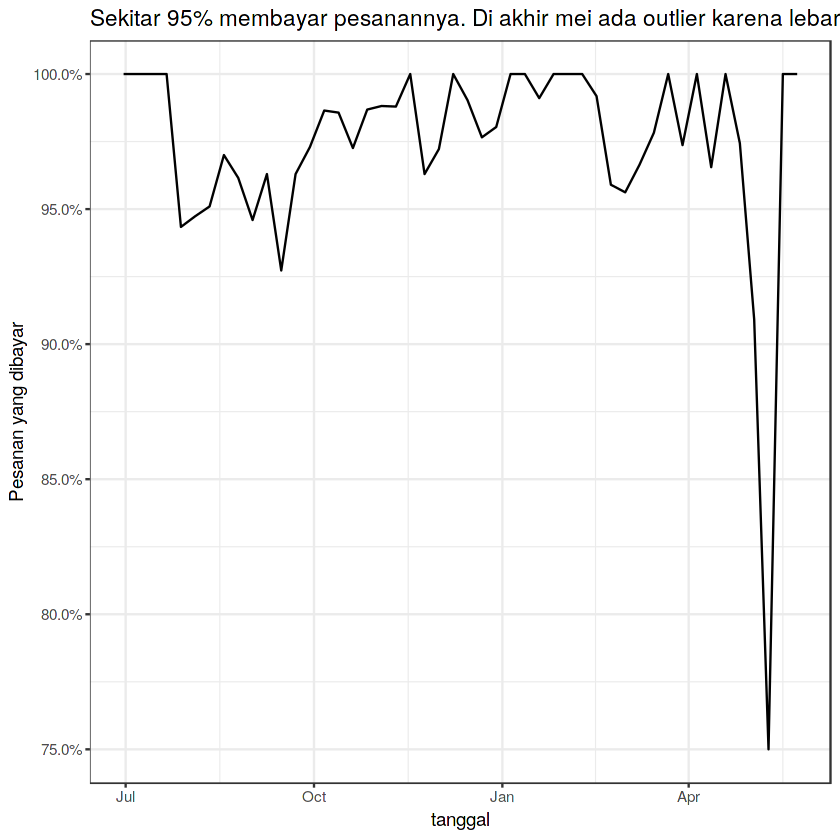

In [11]:
#Membuat data.frame baru dengan menggunakan data.frame df_loan_invest
df_bayar_per_minggu <- df_loan_invest %>% 
    #Filter hanya yang order (kolom tidak kosong)
    filter(!is.na(order)) %>%
    #Buat kolom tanggal yang merupakan pembualatan kebawah dari waktu upload ke marketplace dalam satuan minggu
    mutate(tanggal = floor_date(marketplace, 'week')) %>% 
    #Dikelompokkan berdasarkan kolom tanggal 
    group_by(tanggal) %>%
    #Hitung persen_bayar dengan cara menghitung rata-rata kondisi benar
    summarise(persen_bayar = mean(!is.na(pay))) 
#Membuat plotnya yang berisi tren line dari persen_bayar berdasarkan tanggal
ggplot(df_bayar_per_minggu) +
  geom_line(aes(x = tanggal, y = persen_bayar)) +
  scale_y_continuous(labels = scales::percent) +
  theme_bw() + 
  labs(title="Sekitar 95% membayar pesanannya. Di akhir mei ada outlier karena lebaran", x="tanggal", y="Pesanan yang dibayar")

**Waktu yang dibutuhkan investor untuk membayar pesanan**

`summarise()` ungrouping output (override with `.groups` argument)



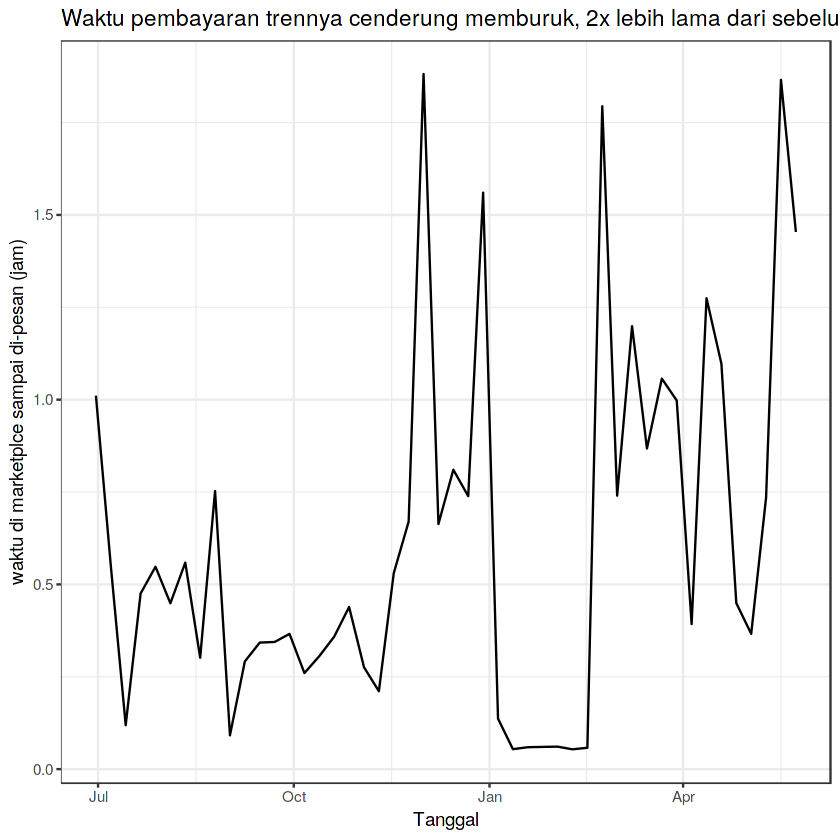

In [12]:
#Membuat data.frame baru dengan menggunakan data.frame df_loan_invest
df_lama_bayar_per_minggu <- df_loan_invest %>% 
    #Filter hanya yang pay (tidak kosong)
    filter(!is.na(pay)) %>%
    #Membuat kolom tanggal yang merupakan pembualatan kebawah dari waktu upload ke order dalam satuan minggu dengan fungsi floor _date
    mutate(tanggal = floor_date(order, 'week'),
           #Hitung lama_bayar sejak di-upload ke order
           lama_bayar = as.numeric(difftime(pay, order, units = "hour"))) %>% 
    #Dikelompokkan berdasarkan kolom tanggal
    group_by(tanggal) %>%
    #Menghitung median dari kolom lama_bayar
    summarise(lama_bayar = median(lama_bayar)) 
#Membuat plotnya yang berisi tren line dari lama pay per minggu,
ggplot(df_lama_bayar_per_minggu) +
    geom_line(aes(x =tanggal, y = lama_bayar)) +
    theme_bw() + 
    labs(title="Waktu pembayaran trennya cenderung memburuk, 2x lebih lama dari sebelumnya", x="Tanggal", y="waktu di marketplce sampai di-pesan (jam)")

# Analisis Summary Investor

**Trend Investor Register**

`summarise()` ungrouping output (override with `.groups` argument)



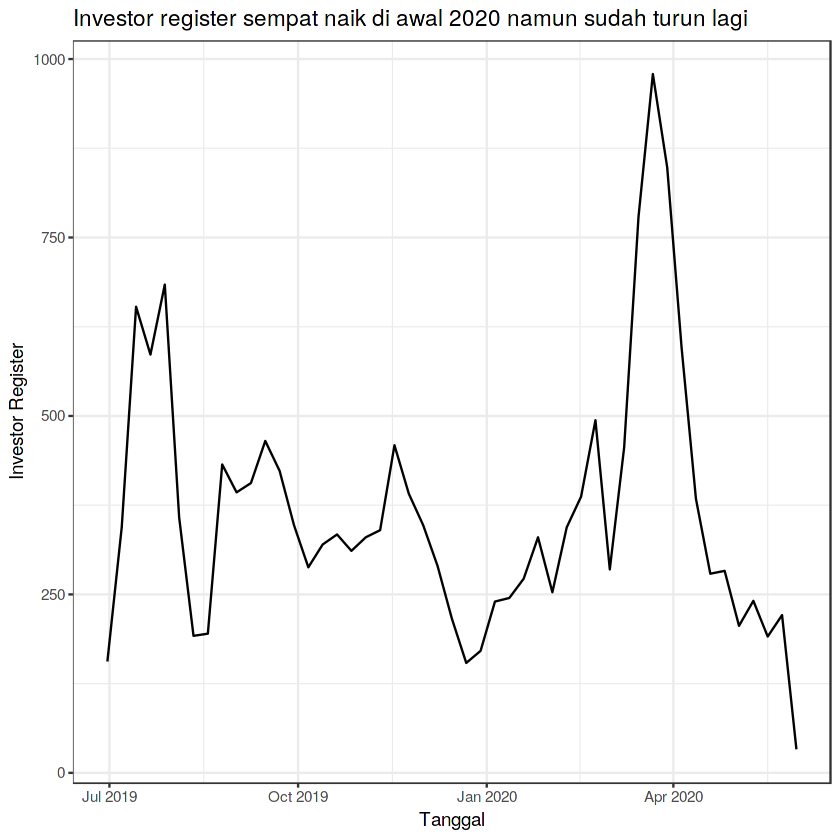

In [13]:
##Membuat data.frame baru dengan menggunakan data.frame df_event
df_investor_register <- df_event %>% 
    #Filter nama_event 'investor_register'
    filter(nama_event=='investor_register') %>%
    #Membuat kolom tanggal yang merupakan pembualatan created_at dalam satuan minggu dengan fungsi floor _date
    mutate(tanggal = floor_date(created_at, 'week')) %>% 
    #Dikelompokkan berdasarkan kolom tanggal
    group_by(tanggal) %>%
    #Hitung jumlah investor setiap minggunya
    summarise(investor = n_distinct(investor_id)) 
#Membuat plotnya yang berisi tren line dari persen_bayar berdasarkan tanggal
ggplot(df_investor_register) +
    geom_line(aes(x = tanggal, y = investor)) +
    theme_bw() + 
    labs(title="Investor register sempat naik di awal 2020 namun sudah turun lagi",
    x="Tanggal", 
    y="Investor Register")

**Trend Investor Investasi Pertama**

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



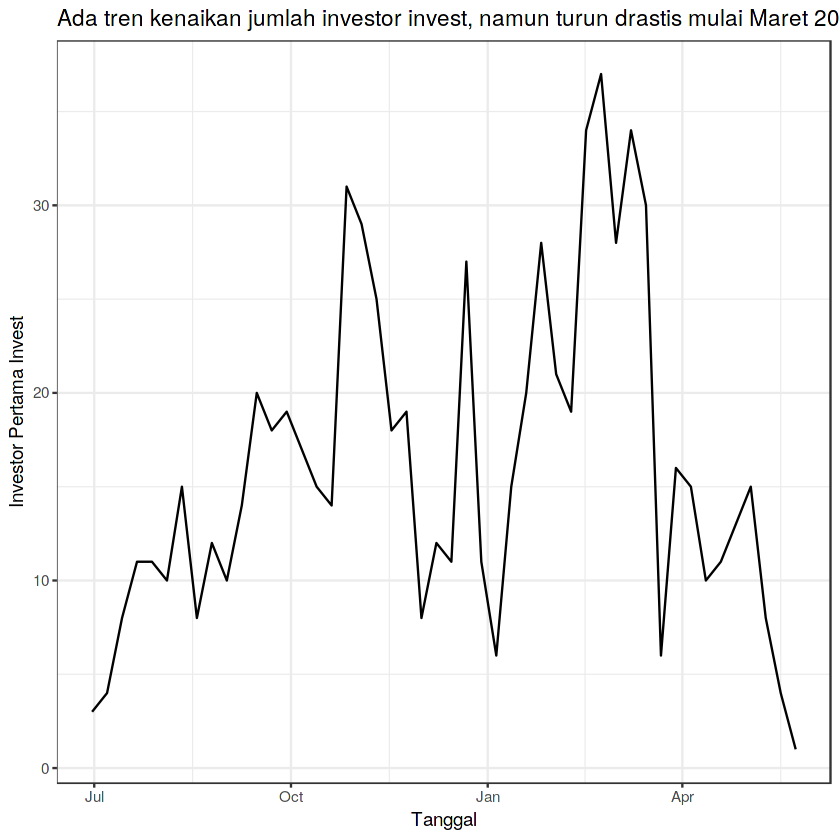

In [14]:
#Membuat data.frame baru dengan menggunakan data.frame df_event
df_investor_pertama_invest <- df_event %>% 
    #Filter nama_event 'investor_pay_loan'
    filter(nama_event=='investor_pay_loan') %>%
    #Dikelompokkan berdasarkan kolom investor_id
    group_by(investor_id) %>% 
    #Mencari tanggal pertama untuk masing - masing investor
    summarise(pertama_invest =min(created_at)) %>% 
    #Membuat kolom tanggal yang merupakan pembualatan pertama_invest dalam satuan minggu dengan fungsi floor _date
    mutate(tanggal = floor_date(pertama_invest, 'week')) %>% 
    #Dikelompokkan berdasarkan kolom tanggal
    group_by(tanggal) %>%
    #Hitung jumlah investor setiap minggunya
    summarise(investor = n_distinct(investor_id))
#Membuat plotnya yang berisi tren line dari persen_bayar berdasarkan tanggal
ggplot(df_investor_pertama_invest) +
  geom_line(aes(x = tanggal, y = investor)) +
  theme_bw() + 
  labs(title = "Ada tren kenaikan jumlah investor invest, namun turun drastis mulai Maret 2020", x = "Tanggal", y = "Investor Pertama Invest")

**Cohort Pertama Invest berdasarkan Bulan Register**

In [15]:
#Membuat data.frame baru dengan menggunakan data.frame df_event
df_register_per_investor <- df_event %>%
    #Filter nama_event 'investor_register'
    filter(nama_event == 'investor_register') %>%
    #Membuat kolom tanggal_register yang merupakan rename dari created_at
    rename(tanggal_register = created_at) %>%
    #Membuat kolom bulan_register yang merupakan floor_date dari tanggal_register
    mutate(bulan_register = floor_date(tanggal_register, 'month')) %>%
    #Memilih kolom investor_id, tanggal_register dan bulan_register
    select(investor_id, tanggal_register, bulan_register)
#Membuat tanggal investasi pertama per investor sebagai df_pertama_invest_per_investor
df_pertama_invest_per_investor <- df_event %>%
    #Filter nama_event 'investor_pay_loan'
    filter(nama_event == 'investor_pay_loan') %>%
    #Dikelompokkan berdasarkan kolom investor_id
    group_by(investor_id) %>%
    #Menghitung tanggal pertama investasi
    summarise(pertama_invest = min(created_at))
#Membuat data.frame baru dengan join data.frame df_register_per_investor dengan df_pertama_invest_per_investor
df_register_per_investor %>%
    #Left join df_register_per_investor dengan df_pertama_invest_per_investor pada investor_id
    left_join(df_pertama_invest_per_investor, by = 'investor_id') %>%
    #Hitung lama_invest dalam bulan,difftime satuan terbesarnya minggu (weeks), jadi hitung selisih hari lalu dibagi 30
    mutate(lama_invest = as.numeric(difftime(pertama_invest, tanggal_register, units = "day")) %/% 30) %>%
    #Mengelompokkan berdasarkan bulan_register dan lama_invest
    group_by(bulan_register, lama_invest) %>%
    #Menghitung investor_per_bulan yakni distinct investor per kategori 
    summarise(investor_per_bulan = n_distinct(investor_id)) %>%
    #Mengelompokkan berdasarkan bulan_register
    group_by(bulan_register) %>%
    #Menghitung total investor dalam bulan register
    mutate(register = sum(investor_per_bulan)) %>%
    #Filter lama_invest yang tidak kosong
    filter(!is.na(lama_invest)) %>%
    #Menghitung total investor
    mutate(invest = sum(investor_per_bulan)) %>%
    #Hitung persen_invest dalam format percent dari hasil invest dibagi register
    mutate(persen_invest = scales::percent(invest/register)) %>%
    #Hitung breakdown_persen_invest dalam format percent dari hasil investor_per_bulan dibagi invest
    mutate(breakdown_persen_invest = scales::percent(investor_per_bulan/invest)) %>%
    #Hilangkan kolom investor_per_bulan karena tidak dipakai
    select(-investor_per_bulan) %>%
    #spread datanya berdasarkan lama_invest sebagai key dan breakdown_persen_invest sebagai value dari masing-masing key
    spread(lama_invest, breakdown_persen_invest)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` regrouping output by 'bulan_register' (override with `.groups` argument)



bulan_register,register,invest,persen_invest,0,1,2,3,4,5,6,7,8,9
<dttm>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2019-07-01,2142,73,3%,61.6%,8.2%,6.8%,5.5%,1.4%,4.1%,5.5%,4.1%,1.4%,1.4%
2019-08-01,1458,74,5%,55.4%,8.1%,14.9%,10.8%,4.1%,2.7%,4.1%,NA,NA,NA
2019-09-01,1763,94,5%,67.0%,21.3%,4.3%,2.1%,3.2%,1.1%,1.1%,NA,NA,NA
2019-10-01,1437,83,6%,77.1%,8.4%,4.8%,7.2%,1.2%,1.2%,NA,NA,NA,NA
2019-11-01,1607,87,5%,75.9%,11.5%,9.2%,1.1%,1.1%,1.1%,NA,NA,NA,NA
2019-12-01,1085,55,5%,69.1%,16.4%,7.3%,5.5%,1.8%,NA,NA,NA,NA,NA
2020-01-01,1138,78,7%,78.2%,15.4%,3.8%,2.6%,NA,NA,NA,NA,NA,NA
2020-02-01,1520,115,8%,86.09%,6.96%,6.09%,0.87%,NA,NA,NA,NA,NA,NA
2020-03-01,2776,53,2%,94%,6%,NA,NA,NA,NA,NA,NA,NA,NA


**Cohort Retention Invest**

In [16]:
#Membuat tanggal investasi per investor dalam data.frame df_investasi_per_investor dari df_event
df_investasi_per_investor <- df_event %>%
    #Filter nama_event 'investor_pay_loan'
    filter(nama_event == 'investor_pay_loan') %>%
    #Membuat kolom baru tanggal_invest yang merupakan rename dari created_at
    rename(tanggal_invest = created_at) %>% 
    #Pilih kolom investor_id, dan tanggal_invest
    select(investor_id, tanggal_invest)


df_pertama_invest_per_investor %>% 
    #Membuat kolom bulan_pertama_invest yang merupakan floor_date dari pertama_invest
    mutate(bulan_pertama_invest = floor_date(pertama_invest, 'month')) %>% 
    #Inner join dengan data.frame df_investasi_per_investor pada investor_id
    inner_join(df_investasi_per_investor, by = 'investor_id') %>%
    #Hitung jarak_invest dalam bulan
    mutate(jarak_invest = as.numeric(difftime(tanggal_invest, pertama_invest, units = "day")) %/% 30) %>% 
    #Mengelompokkan berdasarkan bulan_pertama_invest dan jarak_invest
    group_by(bulan_pertama_invest, jarak_invest) %>%
    #Menghitung investor_per_bulan yakni distinct investor
    summarise(investor_per_bulan = n_distinct(investor_id)) %>%
    #Mengelompokkan berdasarkan bulan_pertama_invest
    group_by(bulan_pertama_invest) %>%
    #Menghitung berapa total investor dengan fungsi max untuk mencari angka tertinggi pada cohort bulan_pertama_invest
    mutate(investor = max(investor_per_bulan )) %>%
    #Hitung breakdown_persen_invest sebagai persebaran jarak invest dari investasi pertama.
    mutate(breakdown_persen_invest = scales::percent(investor_per_bulan/investor)) %>%
    #Menghilangkan kolom investor_per_bulan karena tidak dipakai
    select(-investor_per_bulan) %>%
    #spread datanya berdasarkan jarak_invest sebagai key dan breakdown_persen_invest sebagai value dari masing-masing key
    spread(jarak_invest, breakdown_persen_invest) %>% 
    #Menghilangkan kolom 0 karena hasilnya pasti 100% semua
    select(-`0`)

`summarise()` regrouping output by 'bulan_pertama_invest' (override with `.groups` argument)



bulan_pertama_invest,investor,1,2,3,4,5,6,7,8,10
<dttm>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2019-07-01,31,25.8%,25.8%,19.4%,6.5%,16.1%,16.1%,19.4%,12.9%,3.2%
2019-08-01,51,35.3%,19.6%,25.5%,19.6%,19.6%,21.6%,9.8%,2.0%,NA
2019-09-01,70,25.7%,18.6%,18.6%,15.7%,18.6%,10.0%,1.4%,NA,NA
2019-10-01,80,32.5%,28.8%,17.5%,23.7%,8.7%,6.2%,NA,NA,NA
2019-11-01,99,30.3%,24.2%,24.2%,8.1%,7.1%,1.0%,NA,NA,NA
2019-12-01,63,38.1%,30.2%,3.2%,4.8%,1.6%,NA,NA,NA,NA
2020-01-01,71,32.4%,12.7%,4.2%,1.4%,NA,NA,NA,NA,NA
2020-02-01,115,16.5%,3.5%,0.9%,NA,NA,NA,NA,NA,NA
2020-03-01,102,10.8%,1.0%,NA,NA,NA,NA,NA,NA,NA
